In [1]:
%reload_ext autoreload
%autoreload 2

import os
os.chdir("/home/vscode/kipack/")

In [2]:
import numpy as np
from examples.linear_transport.rbm_2d import run, maxwellian_vec_init
# from examples.linear_transport.rbm_2d_ap import run

# Parameters
kn = lambda x, y: 1.0
sigma_s = lambda x, y: 1.0
sigma_a = lambda x, y: 0.0
Q = lambda x, y: 1.0

xmin = [0.0, 0.0]
xmax = [1.0, 1.0]
nx = 20

dx = (xmax[0] - xmin[0]) / nx
dt = 0.025
nt = 400

BC = "dirichlet"
f_l = lambda vx, vy: 0.0
f_r = lambda vx, vy: 0.0
f_b = lambda vx, vy: 0.0
f_t = lambda vx, vy: 0.0

scheme = "Euler"

init_func = lambda vx, vy, ux, uy, T, rho: 0.0

In [3]:
output_ref = run(kn=kn, sigma_s=sigma_s, sigma_a=sigma_a, Q=Q,
                 xmin=xmin, xmax=xmax, nx=nx, dt=dt, nt=nt,
                 BC=BC, f_l=f_l, f_b=f_b, f_r=f_r, f_t=f_t, 
                 coll="linear", scheme=scheme,
                 init_func=init_func)

2 dimensional collision model.
Number of velocity cells: 32.
Velocity domain: disk with raidus 1.0.
dt is 0.025
400/400 [==============================] - 19s 49ms/step


In [4]:
output_rbm = run(kn=kn, sigma_s=sigma_s, sigma_a=sigma_a, Q=Q,
                 xmin=xmin, xmax=xmax, nx=nx, dt=dt, nt=nt,
                 BC=BC, f_l=f_l, f_b=f_b, f_r=f_r, f_t=f_t,
                 coll="rbm", scheme=scheme,
                 init_func=init_func)

2 dimensional collision model.
Number of velocity cells: 32.
Velocity domain: disk with raidus 1.0.
dt is 0.025
400/400 [==============================] - 19s 47ms/step


In [5]:
def plot_3d(ax1, macro_ref, colors):
    pic = ax1.plot_surface(x, y, macro_ref, rstride=1, cstride=1, facecolors=colors)
    pic.set_facecolor((0, 0, 0, 0))
#     [t.set_va('center') for t in ax1.get_yticklabels()]
#     [t.set_ha('left') for t in ax1.get_yticklabels()]
#     [t.set_va('center') for t in ax1.get_xticklabels()]
#     [t.set_ha('right') for t in ax1.get_xticklabels()]
    # [t.set_va('center') for t in ax1.get_zticklabels()]
    # [t.set_ha('left') for t in ax1.get_zticklabels()]
    # Make panes transparent
    ax1.xaxis.pane.fill = False # Left pane
    ax1.yaxis.pane.fill = False # Right pane
    ax1.zaxis.pane.fill = False
    # Remove grid lines
    ax1.grid(False)
    # Remove tick labels
#     ax1.xaxis._axinfo['tick']['inward_factor'] = 0
#     ax1.xaxis._axinfo['tick']['outward_factor'] = 0.4
#     ax1.yaxis._axinfo['tick']['inward_factor'] = 0
#     ax1.yaxis._axinfo['tick']['outward_factor'] = 0.4
#     ax1.zaxis._axinfo['tick']['inward_factor'] = 0
#     ax1.zaxis._axinfo['tick']['outward_factor'] = 0.4
#     ax1.xaxis.set_major_locator(MultipleLocator(0.25))
#     ax1.yaxis.set_major_locator(MultipleLocator(0.25))
#     ax1.zaxis.set_major_locator(MultipleLocator(0.02))
#     ax1.view_init(20, 20)
    
    ax1.set_xlabel(r"$x$", fontsize=14)
    ax1.set_ylabel(r"$y$", fontsize=14)
    ax1.set_zlabel(r"$\rho$", fontsize=14, rotation=180)
#     ax1.legend()

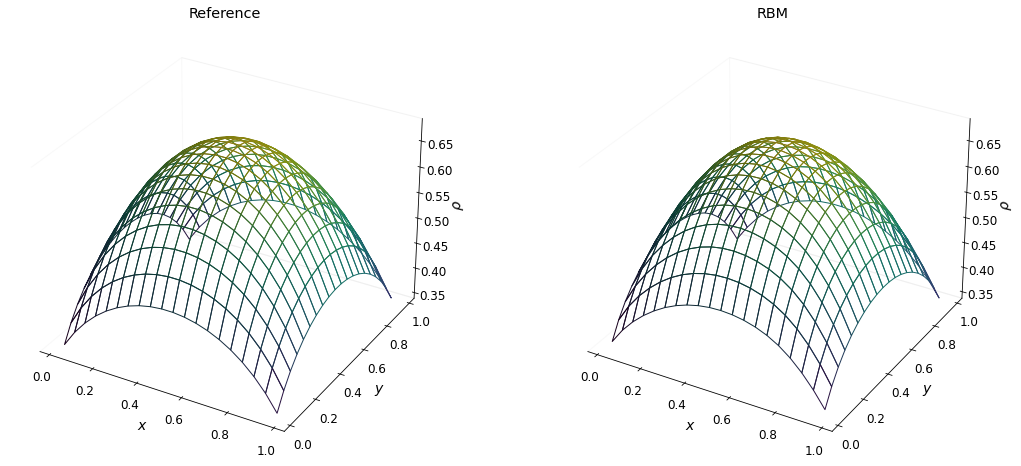

In [6]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MultipleLocator
from matplotlib import rc

t_idx = -1

macro_ref = output_ref["macro_frames"]
macro_rbm = output_rbm["macro_frames"]

x, y = output_ref["mesh"]
t = output_ref["t"]

# X = np.linspace(0, 1, 20)
# X, Y = np.meshgrid(X, X)

rc('font',size=12)
rc('font',family='sans')
rc('axes',labelsize=14)

fig = plt.figure(figsize=(18, 8))

norm = plt.Normalize(macro_ref[t_idx].min(), macro_ref[t_idx].max())
colors = cm.viridis(norm(macro_ref[t_idx]))

ax1 = fig.add_subplot(121, projection='3d')
plot_3d(ax1, macro_ref[t_idx], colors)
# ax1.set_xlabel(r"$x$", fontsize=14)
# ax1.set_ylabel(r"$\rho$", fontsize=14)
# ax1.legend()
ax1.set_title(r"Reference")

ax2 = fig.add_subplot(122, projection='3d')
plot_3d(ax2, macro_rbm[t_idx], colors)
ax2.set_title(r"RBM")
# ax2.plot(x, macro_ref[t_idx], label="Ref")
# ax2.plot(x, macro_rbm_symm[t_idx], "o", markevery=1, label="RBM-Symm")
# ax2.set_xlabel(r"$x$", fontsize=14)
# ax2.set_ylabel(r"$\rho$", fontsize=14)
# ax2.legend()

plt.show()

In [7]:
fig.savefig("./examples/notebooks/linear_transport/figs/2d_sol.pdf")

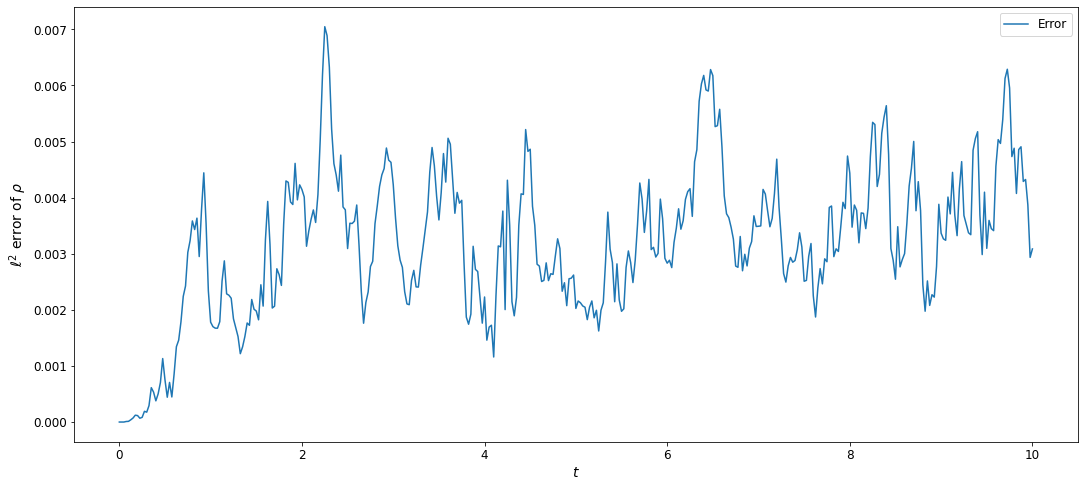

In [8]:
fig, ax = plt.subplots(figsize=(18, 8))
rho_errs_rbm = [np.sqrt(np.sum((macro_rbm[t_idx] - macro_ref[t_idx]) ** 2) * dx ** 2) for t_idx in range(nt + 1)]
ax.plot(t, rho_errs_rbm, label="Error")
ax.set_xlabel(r"$t$", fontsize=14)
ax.set_ylabel(r"$\ell^2$ error of $\rho$", fontsize=14)
ax.legend()
plt.show()

In [9]:
fig.savefig("./examples/notebooks/linear_transport/figs/2d_err.pdf")